## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import re

## Simple Stats

In [2]:
# read in cleaned csv
pet_df = pd.read_csv('./data/cleaned_pet.csv').drop(columns = 'Unnamed: 0')

# check first 5 rows
pet_df.head()

,subreddit,selftext,title,created_utc
0,dogs,So my miniature poodle can't last more than 10...,Barking when he is alone and awake,1673991330
1,dogs,Genuinely curious. My vet won’t answer this qu...,When is an appropriate age to start taking you...,1673991096
2,dogs,My 2.5 year mixed breed male dog has to have k...,Knee surgery,1673990893
3,dogs,I’m new to reddit and came across this sub. I ...,Positive and Negative Punishment,1673990776
4,dogs,Looking for advice on which dog washing statio...,HOA Agreed to purchase dog washing station,1673990697


##### Text Length

In [3]:
# check first row in 'selftext' column
pet_df['selftext'][0]

"So my miniature poodle can't last more than 10-15mins in a room alone without barking.\n\nI'm not sure if this is actually separation anxiety because he can still eat the kong and fall asleep when we are away for 10-15mins. But once he finishes the kong or wakes up because of a noise, he then realises he is alone and starts barking intermittently which eventually becomes a howl. Also, he is able to rest somewhere else in the house (like in the corridor) without seeing us if the doors to our rooms are open and we are in the house, it's just when he is enclosed behind shut doors that he starts barking.\n\nHas anyone else had a similar situation and been successful in overcoming it? What worked for you?"

In [4]:
# check last
pet_df['selftext'][1999]

' '

In [5]:
# find length of first row
len(pet_df['selftext'][0])

705

In [6]:
# find length of last
len(pet_df['selftext'][1999])

1

In [7]:
# create new column for selftext length
pet_df['text_length'] = pet_df['selftext'].apply(len)

In [8]:
# do one for title
pet_df['title_length'] = pet_df['title'].apply(len)

In [9]:
# check
pet_df.head()

,subreddit,selftext,title,created_utc,text_length,title_length
0,dogs,So my miniature poodle can't last more than 10...,Barking when he is alone and awake,1673991330,705,34
1,dogs,Genuinely curious. My vet won’t answer this qu...,When is an appropriate age to start taking you...,1673991096,914,79
2,dogs,My 2.5 year mixed breed male dog has to have k...,Knee surgery,1673990893,546,12
3,dogs,I’m new to reddit and came across this sub. I ...,Positive and Negative Punishment,1673990776,3611,32
4,dogs,Looking for advice on which dog washing statio...,HOA Agreed to purchase dog washing station,1673990697,283,42


##### Word Count

In [10]:
# get word count for first row of selftext
len(pet_df['selftext'][0].split())

130

In [11]:
# word count for last
len(pet_df['selftext'][1999].split())

0

In [12]:
# create new column for selftext word count
pet_df['text_word_count'] = pet_df['selftext'].apply(lambda x: len(x.split()))

In [13]:
# one for title word count
pet_df['title_word_count'] = pet_df['title'].apply(lambda x: len(x.split()))

In [14]:
# check
pet_df.head()

,subreddit,selftext,title,created_utc,text_length,title_length,text_word_count,title_word_count
0,dogs,So my miniature poodle can't last more than 10...,Barking when he is alone and awake,1673991330,705,34,130,7
1,dogs,Genuinely curious. My vet won’t answer this qu...,When is an appropriate age to start taking you...,1673991096,914,79,178,15
2,dogs,My 2.5 year mixed breed male dog has to have k...,Knee surgery,1673990893,546,12,95,2
3,dogs,I’m new to reddit and came across this sub. I ...,Positive and Negative Punishment,1673990776,3611,32,648,4
4,dogs,Looking for advice on which dog washing statio...,HOA Agreed to purchase dog washing station,1673990697,283,42,54,7


In [15]:
# summary stats on the columns we just made
pet_df[['text_length', 'title_length', 'text_word_count', 'title_word_count']].describe()

,text_length,title_length,text_word_count,title_word_count
count,2000.00000,2000.000000,2000.000000,2000.000000
mean,466.13150,45.535000,88.373500,8.711500
std,875.10176,34.972179,163.646289,6.899425
min,1.00000,1.000000,0.000000,1.000000
25%,1.00000,23.000000,0.000000,4.000000
50%,55.50000,37.000000,10.000000,7.000000
75%,620.00000,58.000000,118.000000,11.000000
max,8964.00000,300.000000,1633.000000,60.000000


##### Length and Word Count Visualization

In [16]:
# from breakfast hour notebook 1/10
# separate by subreddits: 'dogs' and 'cats'
dogs = pet_df[pet_df['subreddit'] == 'dogs']
cats = pet_df[pet_df['subreddit'] == 'cats']

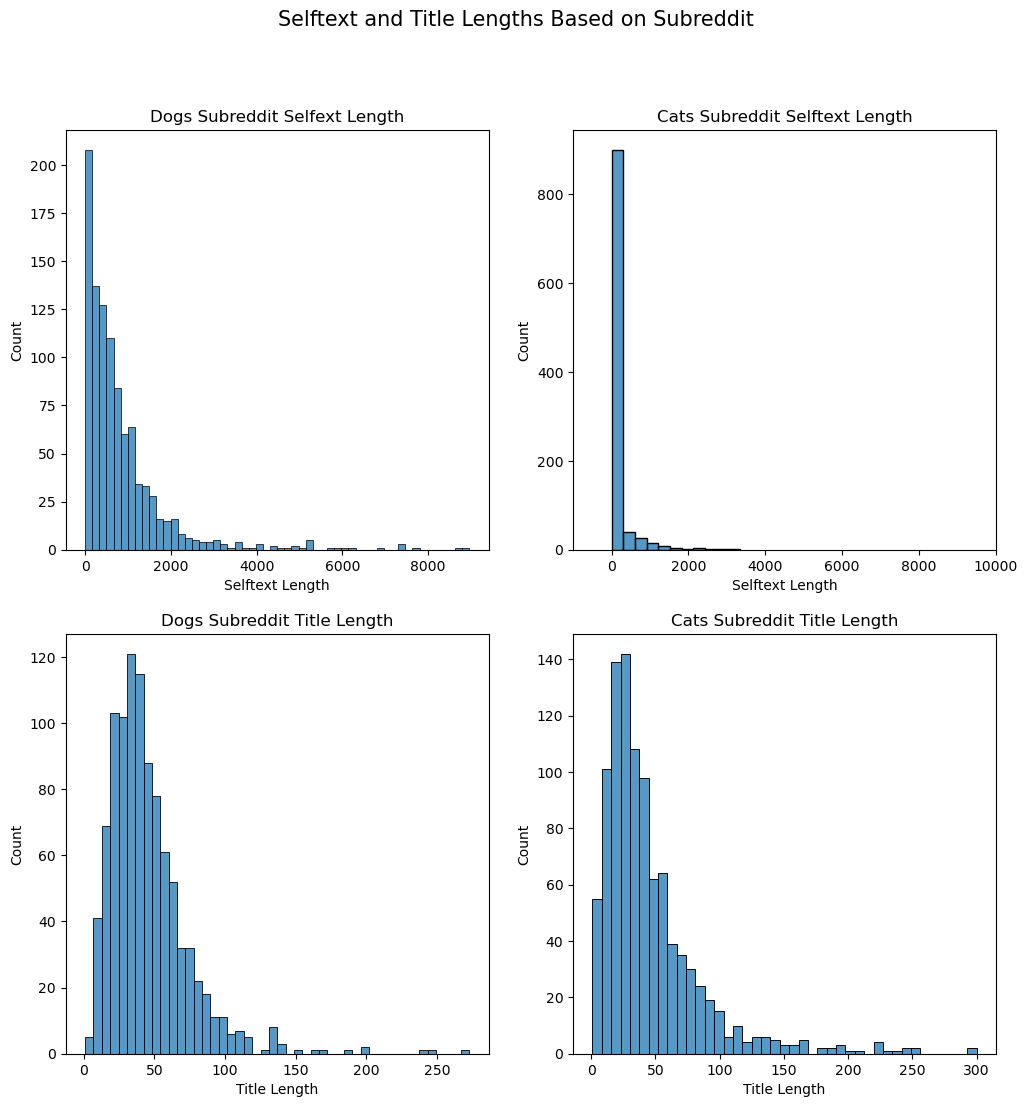

In [38]:
fig, ax = plt.subplots(2, 2, figsize = (12,12))
sns.histplot(dogs['text_length'], ax = ax[0,0])
sns.histplot(cats['text_length'], ax = ax[0,1])
sns.histplot(dogs['title_length'], ax = ax[1,0])
sns.histplot(cats['title_length'], ax = ax[1,1])

ax[0,0].set(xlabel = 'Selftext Length', title = 'Dogs Subreddit Selfext Length')
ax[0,1].set(xlabel = 'Selftext Length', title = 'Cats Subreddit Selftext Length', xlim = [-1000, 10_000])
ax[1,0].set(xlabel = 'Title Length', title = 'Dogs Subreddit Title Length')
ax[1,1].set(xlabel = 'Title Length', title = 'Cats Subreddit Title Length')

fig.suptitle('Selftext and Title Lengths Based on Subreddit', fontsize = 15);

plt.savefig('./images/text_and_title_lengths.png');

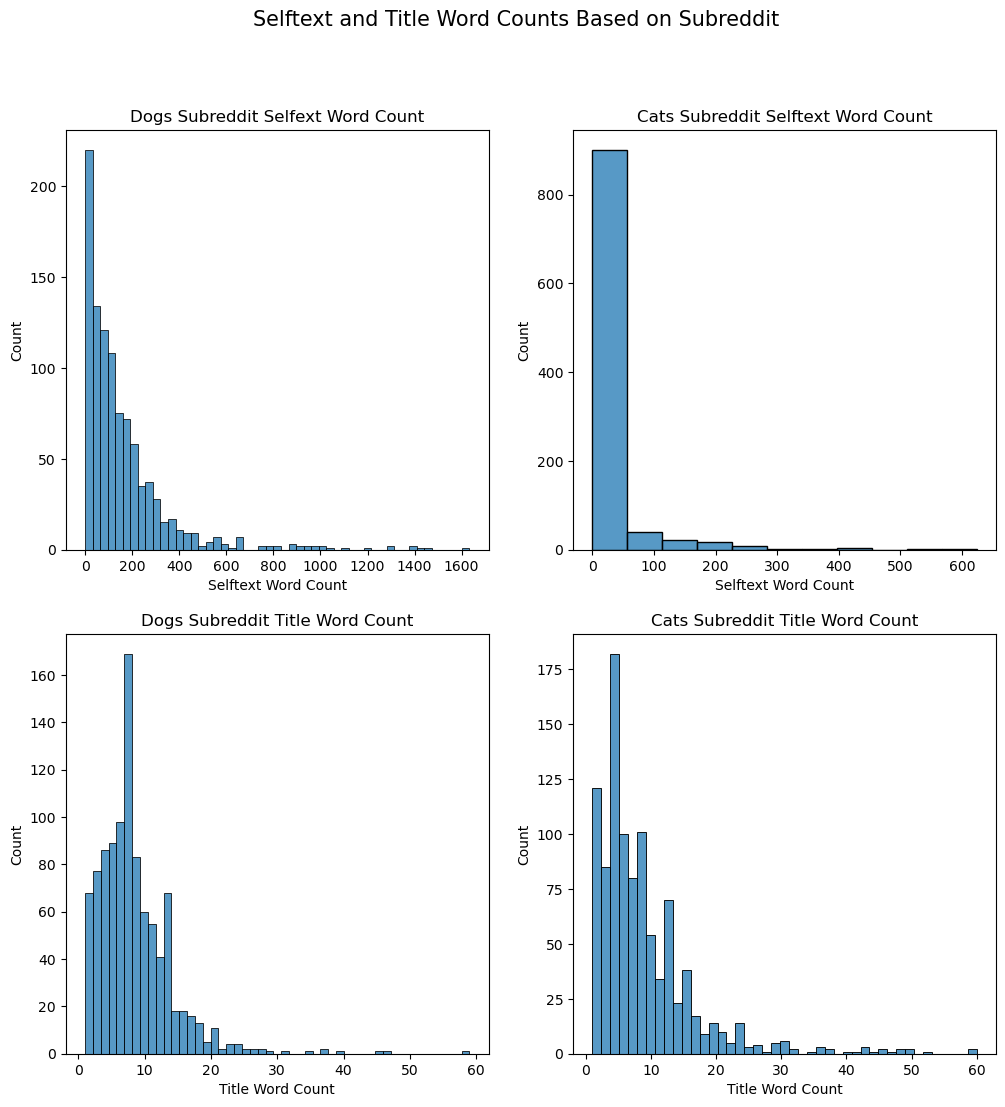

In [39]:
# let's do the same thing for word count
fig, ax = plt.subplots(2, 2, figsize = (12,12))
sns.histplot(dogs['text_word_count'], ax = ax[0,0])
sns.histplot(cats['text_word_count'], ax = ax[0,1])
sns.histplot(dogs['title_word_count'], ax = ax[1,0])
sns.histplot(cats['title_word_count'], ax = ax[1,1])

ax[0,0].set(xlabel = 'Selftext Word Count', title = 'Dogs Subreddit Selfext Word Count')
ax[0,1].set(xlabel = 'Selftext Word Count', title = 'Cats Subreddit Selftext Word Count')
ax[1,0].set(xlabel = 'Title Word Count', title = 'Dogs Subreddit Title Word Count')
ax[1,1].set(xlabel = 'Title Word Count', title = 'Cats Subreddit Title Word Count')

fig.suptitle('Selftext and Title Word Counts Based on Subreddit', fontsize = 15);

plt.savefig('./images/text_and_title_word_counts.png');

## N-Grams

#### Top Words

In [45]:
# source: breakfast hour notebook 1/10
# top words for 'selftext'
cv = CountVectorizer(stop_words = 'english')

dogs_vect = cv.fit_transform(dogs['selftext'])
dogs_vect_df = pd.DataFrame(dogs_vect.todense(), columns = cv.get_feature_names_out())

cats_vect = cv.fit_transform(cats['selftext'])
cats_vect_df = pd.DataFrame(cats_vect.todense(), columns = cv.get_feature_names_out())

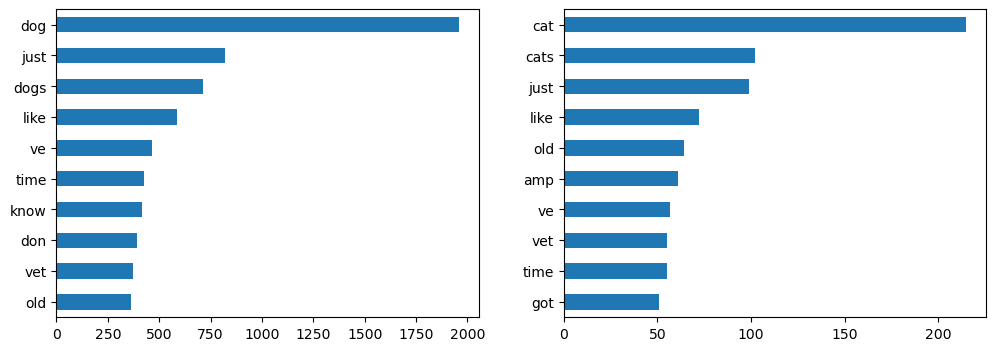

In [46]:
# visualize
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
dogs_vect_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax = ax[0])
cats_vect_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax = ax[1])

ax[0].invert_yaxis()
ax[1].invert_yaxis();

plt.savefig('./images/text_top_words.png');

In [47]:
# Take a look at the top 10 words for 'dogs'
dogs_vect_df.sum().sort_values(ascending = False).head(10)

dog     1959
just     821
dogs     713
like     587
ve       465
time     427
know     414
don      390
vet      371
old      361
dtype: int64

In [48]:
# Take a look at the top 10 words for 'cats'
cats_vect_df.sum().sort_values(ascending = False).head(10)

cat     215
cats    102
just     99
like     72
old      64
amp      61
ve       57
vet      55
time     55
got      51
dtype: int64

In [49]:
# top words for 'title'
cv = CountVectorizer(stop_words = 'english')

dogs_vect_2 = cv.fit_transform(dogs['title'])
dogs_vect_2_df = pd.DataFrame(dogs_vect_2.todense(), columns = cv.get_feature_names_out())

cats_vect_2 = cv.fit_transform(cats['title'])
cats_vect_2_df = pd.DataFrame(cats_vect_2.todense(), columns = cv.get_feature_names_out())

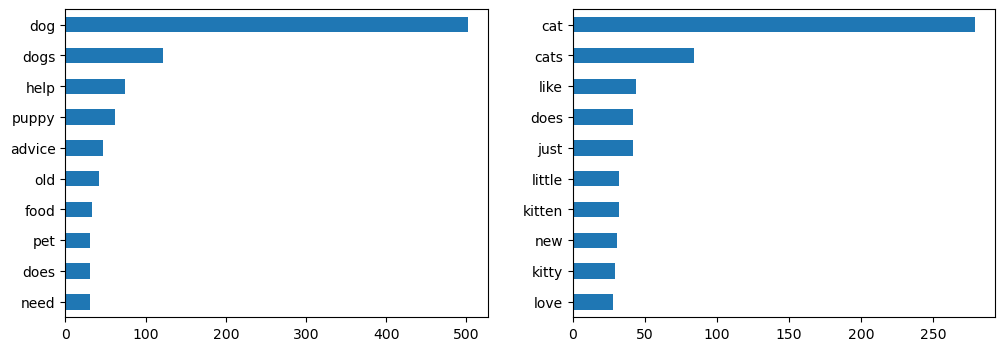

In [50]:
# visualize
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
dogs_vect_2_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax = ax[0])
cats_vect_2_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax = ax[1])

ax[0].invert_yaxis()
ax[1].invert_yaxis();

plt.savefig('./images/title_top_words.png');

In [51]:
# Take a look at the top 10 words for 'title' in 'dogs'
dogs_vect_2_df.sum().sort_values(ascending = False).head(10)

dog       502
dogs      122
help       74
puppy      62
advice     47
old        42
food       33
pet        31
does       31
need       30
dtype: int64

In [52]:
# Take a look at the top 10 bigrams for 'title' in 'cats'
cats_vect_2_df.sum().sort_values(ascending = False).head(10)

cat       279
cats       84
like       44
does       42
just       42
little     32
kitten     32
new        31
kitty      29
love       28
dtype: int64

##### The top words are similar for selftext and title for their respective subreddits, but where they differ is in the numbers for each. Reasonably, the selftext/the body of the post has more words than the titles do.

#### Top Bigrams

In [27]:
# top bigrams for 'selftext'
cv = CountVectorizer(stop_words = 'english', ngram_range = (2, 2))

dogs_vect = cv.fit_transform(dogs['selftext'])
dogs_vect_df = pd.DataFrame(dogs_vect.todense(), columns = cv.get_feature_names_out())

cats_vect = cv.fit_transform(cats['selftext'])
cats_vect_df = pd.DataFrame(cats_vect.todense(), columns = cv.get_feature_names_out())

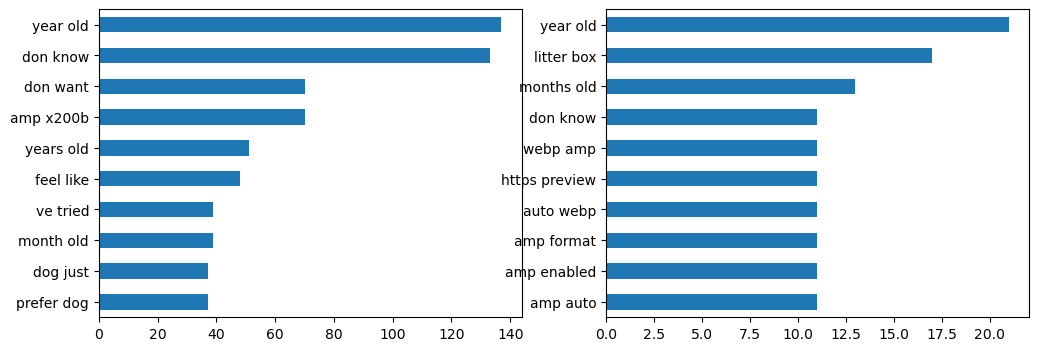

In [43]:
# visualize
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
dogs_vect_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax = ax[0])
cats_vect_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax = ax[1])

ax[0].invert_yaxis()
ax[1].invert_yaxis();

plt.savefig('./images/text_top_bigrams.png');

In [29]:
# Take a look at the top 10 bigrams for 'selftext' in 'dogs'
dogs_vect_df.sum().sort_values(ascending = False).head(10)

year old      137
don know      133
don want       70
amp x200b      70
years old      51
feel like      48
ve tried       39
month old      39
dog just       37
prefer dog     37
dtype: int64

In [30]:
# Take a look at the top 10 bigrams for 'selftext' in 'cats'
cats_vect_df.sum().sort_values(ascending = False).head(10)

year old         21
litter box       17
months old       13
don know         11
webp amp         11
https preview    11
auto webp        11
amp format       11
amp enabled      11
amp auto         11
dtype: int64

In [31]:
# top bigrams for 'title'
cv = CountVectorizer(stop_words = 'english', ngram_range = (2, 2))

dogs_vect_2 = cv.fit_transform(dogs['title'])
dogs_vect_2_df = pd.DataFrame(dogs_vect_2.todense(), columns = cv.get_feature_names_out())

cats_vect_2 = cv.fit_transform(cats['title'])
cats_vect_2_df = pd.DataFrame(cats_vect_2.todense(), columns = cv.get_feature_names_out())

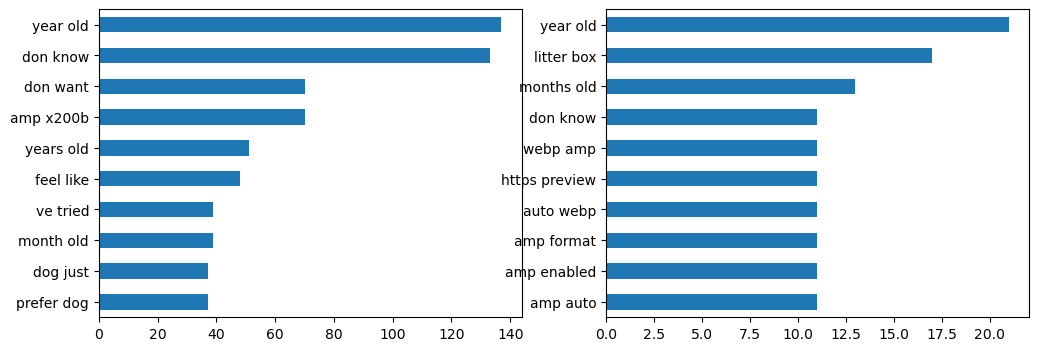

In [44]:
# visualize
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
dogs_vect_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax = ax[0])
cats_vect_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax = ax[1])

ax[0].invert_yaxis()
ax[1].invert_yaxis();

plt.savefig('./images/title_top_bigrams.png');

In [33]:
# Take a look at the top 10 bigrams for 'title' in 'dogs'
dogs_vect_2_df.sum().sort_values(ascending = False).head(10)

year old         18
need advice      13
dog food         13
does dog         11
old dog          11
dog owner        11
pet insurance    10
new dog          10
dog owners        9
help dog          9
dtype: int64

In [34]:
# Take a look at the top 10 bigrams for 'title' in 'cats'
cats_vect_2_df.sum().sort_values(ascending = False).head(10)

does cat          15
new cat            8
year old           8
need help          6
years old          6
don know           5
cat does           5
does know          5
old kitten         4
counter soften     4
dtype: int64

##### From our bigram list, we can see there are certain words we want to ignore:
* webp
* https
* preview
* amp 
* format
* enabled
* auto
* dog
* dogs
* cat
* cats
* puppy
* puppies
* kitty
* kitties

##### We'll do additional cleaning to remove those words and get a better bigram representation in the modeling notebook.

In [35]:
# save
pet_df.to_csv('./data/eda_pets.csv')